In [179]:
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from pylab import title, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF
import os
import seaborn as sns

In [180]:
df = pd.read_csv('Consolidated_Report.csv')

In [181]:
def pivott_v2(df, FP, FV, PE):
    data=df.copy()
    for i in range(0,len(FP)):
        filt = FP[i]
        Var = FV[i]
        for j in Var:
            data = data[data[filt] == j]
    Result = dict()
    for i in data[PE]:
        Result[i] = Result.get(i, 0) + 1
    Result_dict = dict()
    Result_dict[PE] = list(Result.keys())
    Result_dict['Count'] = list(Result.values())
    ret_frame = pd.DataFrame(data=Result_dict).sort_values('Count',ascending=False)
    return ret_frame


In [ ]:
def createPDF(Main_result):
    pdf = FPDF()
    for Heading,data in Main_result.items():
        pdf.add_page()
        pdf.set_xy(0, 0)
        pdf.set_font('arial', 'B', 14)
        pdf.cell(90, 5, " ", 0, 1, 'C')
        pdf.cell(60)
        pdf.cell(75, 10, Heading, 0, 1, 'C')
        pdf.cell(90, 10, " ", 0, 1, 'C')
        #pdf.cell(-40)
        pdf.set_font('arial', 'B', 12)
        pdf.cell(40)
        pdf.cell(15, 10, 'S.No', 1, 0, 'C')
        pdf.cell(50, 10, data.columns[0], 1, 0, 'C')
        pdf.cell(30, 10, 'Counts', 1, 1, 'C')
        #pdf.cell(-90)
        pdf.set_font('arial', '', 8)
        keyss= list(data.iloc[:,0])
        values = list(data.iloc[:,1])
        for i in range(0, len(keyss)):
            if i==10:
                break
            pdf.cell(40)
            pdf.cell(15, 5, '%s' % (str(i)), 1, 0, 'C')
            pdf.cell(50, 5, '%s' % (str(keyss[i])), 1, 0, 'R')
            pdf.cell(30, 5, '%s' % (str(values[i])), 1, 1, 'L')
            #pdf.cell(-90)
        sns.set(rc={'figure.figsize':(11,11)})
        plt.figure(figsize=(11,11))
        sns_plot = sns.barplot(x = data.columns[0], y = 'Count', data=data.head(6), palette="Blues_d")
        for p in sns_plot.patches:
            sns_plot.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', 
                                xytext = (0, 9), 
                                textcoords = 'offset points')    
        #fig = sns_plot.get_figure()
        image_name = 'chart_'+data.columns[0]+report_name+str(iter)+'.png'
        iter+=1
        plt.savefig(temp_path+image_name)
        plt.clf()
        pdf.cell(90, 1, " ", 0, 2, 'C')
        pdf.image(temp_path+image_name, x = 20, y = None, w = 150, h = 120, type = '', link = '')
        os.remove(temp_path+image_name)
    try:    
        pdf.output(report_name, 'F')
    except:
        print('Error while saving PDF file... Failed to generate PDF report')
        return -1
return 0



In [188]:
def generateReport_v2(df):
    path = os.getcwd()+"\\"+"Utility_Files"+"\\"+"report_filters.txt"
    temp_path = os.getcwd()+"\\"+"temp"+"\\"
    with open(path) as f:
        filt = f.read()
    filt=filt.replace('\n',"").replace(" ","").replace("]}","").replace("%"," ")
    filt=filt.replace(']','').split(";")
    if len(filt[-1])==0:
        filt.pop()
        
    Main_result={}
    iter = 0
    for line in filt:
        filt_p=[]
        filt_v=[]
        line = line.split(',')
        if line[0].split('{')[0]=='Filter':
            lin=line[0].replace('Filter{[','')
            lin=lin.split('&')
            
            for k in lin:
                f_V=[]
                m=k.split('=')
                f_V.append(m[1])
                filt_p.append(m[0])
                filt_v.append(f_V)
            PE=line[1].split('=')[1]
            Heading=line[2].split('=')[1].replace('}','')
            Main_result[Heading]=pivott_v2(df, filt_p, filt_v, PE)
            
        elif line[0].split('{')[0]=='Generate':
            report_name=line[0].split('{')[1].replace('Filename=','').replace('}','')+'.pdf'
            print('Generating ',report_name,'...')
            pdf = FPDF()
            for Heading,data in Main_result.items():
                pdf.add_page()
                pdf.set_xy(0, 0)
                pdf.set_font('arial', 'B', 14)
                pdf.cell(90, 5, " ", 0, 1, 'C')
                pdf.cell(60)
                pdf.cell(75, 10, Heading, 0, 1, 'C')
                pdf.cell(90, 10, " ", 0, 1, 'C')
                #pdf.cell(-40)
                pdf.set_font('arial', 'B', 12)
                pdf.cell(40)
                pdf.cell(15, 10, 'S.No', 1, 0, 'C')
                pdf.cell(50, 10, data.columns[0], 1, 0, 'C')
                pdf.cell(30, 10, 'Counts', 1, 1, 'C')
                #pdf.cell(-90)
                pdf.set_font('arial', '', 8)
                keyss= list(data.iloc[:,0])
                values = list(data.iloc[:,1])
                for i in range(0, len(keyss)):
                    if i==10:
                        break
                    pdf.cell(40)
                    pdf.cell(15, 5, '%s' % (str(i)), 1, 0, 'C')
                    pdf.cell(50, 5, '%s' % (str(keyss[i])), 1, 0, 'R')
                    pdf.cell(30, 5, '%s' % (str(values[i])), 1, 1, 'L')
                    #pdf.cell(-90)
                sns.set(rc={'figure.figsize':(11,11)})
                plt.figure(figsize=(11,11))
                sns_plot = sns.barplot(x = data.columns[0], y = 'Count', data=data.head(6), palette="Blues_d")
                for p in sns_plot.patches:
                    sns_plot.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', 
                                xytext = (0, 9), 
                                textcoords = 'offset points')    
                #fig = sns_plot.get_figure()
                image_name = 'chart_'+data.columns[0]+report_name+str(iter)+'.png'
                iter+=1
                plt.savefig(temp_path+image_name)
                plt.clf()
                pdf.cell(90, 1, " ", 0, 2, 'C')
                pdf.image(temp_path+image_name, x = 20, y = None, w = 150, h = 120, type = '', link = '')
                os.remove(temp_path+image_name)
            try:    
                pdf.output(report_name, 'F')
                Main_result = {}
            except:
                print('Error while saving PDF file... Failed to generate PDF report')
                return -1
        else:
            print('Invalid Syntax in report_filters.txt... PDF report not generated')
            return -1

In [189]:
generateReport_v2(df)

Generating  WPB_Report.pdf ...
Generating  SPB_Report.pdf ...
Generating  EB_Report.pdf ...
Generating  RB_Report.pdf ...


<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

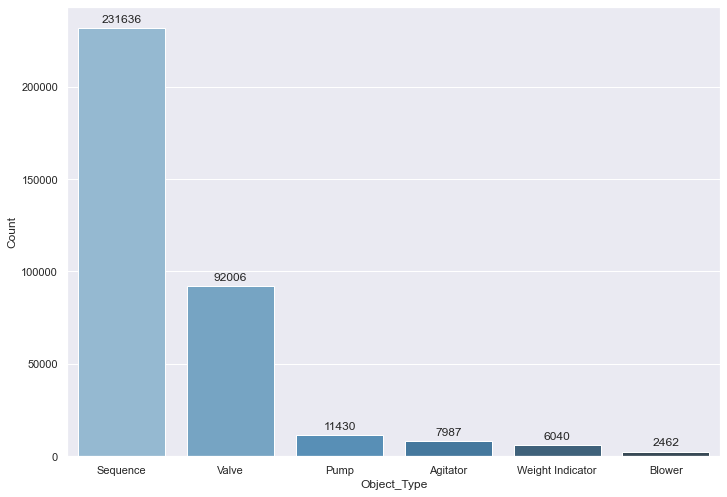

In [128]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.barplot(x = PE, y = 'Count', data=ret.head(6), palette="Blues_d")
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
fig = sns_plot.get_figure()
fig.savefig('chart.png')

In [158]:
path = "filter.txt"
with open(path) as f:
    filt = f.read()
filt=filt.replace('\n',"").replace(" ","").replace("]}","").replace("%"," ")
filt=filt.replace(']','').split(";")
if len(filt[-1])==0:
    filt.pop()
    
Main_result={}
iter = 0
for line in filt:
    filt_p=[]
    filt_v=[]
    result=[]
    line = line.split(',')
    if line[0].split('{')[0]=='Filter':
        lin=line[0].replace('Filter{[','')
        lin=lin.split('&')
        
        for k in lin:
            f_V=[]
            m=k.split('=')
            f_V.append(m[1])
            filt_p.append(m[0])
            filt_v.append(f_V)
        PE=line[1].split('=')[1]
        Heading=line[2].split('=')[1].replace('}','')
        Main_result[Heading]=pivott(df1, filt_p, filt_v, PE)
        
    elif line[0].split('{')[0]=='Generate':
        report_name=line[0].split('{')[1].replace('Filename=','').replace('}','')+'.pdf'
        print('Generating ',report_name,'..........')
        pdf = FPDF()
        for Heading,data in Main_result.items():
            pdf.add_page()
            pdf.set_xy(0, 0)
            pdf.set_font('arial', 'B', 12)
            pdf.cell(60)
            pdf.cell(75, 10, Heading, 0, 2, 'C')
            pdf.cell(90, 10, " ", 0, 2, 'C')
            pdf.cell(-40)
            pdf.cell(40, 10, 'S.No', 1, 0, 'C')
            pdf.cell(50, 10, 'Param', 1, 0, 'C')
            pdf.cell(40, 10, 'Counts', 1, 2, 'C')
            pdf.cell(-90)
            pdf.set_font('arial', '', 10)
            keyss= list(data.iloc[:,0])
            values = list(data.iloc[:,1])
            for i in range(0, len(keyss)):
                if i==10:
                    break
                pdf.cell(40, 8, '%s' % (str(i)), 1, 0, 'C')
                pdf.cell(50, 8, '%s' % (str(keyss[i])), 1, 0, 'C')
                pdf.cell(40, 8, '%s' % (str(values[i])), 1, 2, 'C')
                pdf.cell(-90)
            sns.set(rc={'figure.figsize':(7,5)})
            plt.figure(figsize=(7,5))
            sns_plot = sns.barplot(x = data.columns[0], y = 'Count', data=data.head(6), palette="Blues_d")
            for p in sns_plot.patches:
                sns_plot.annotate(format(p.get_height(), '.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')    
            #fig = sns_plot.get_figure()
            image_name = 'chart_'+data.columns[0]+str(iter)+'.png'
            iter+=1
            plt.savefig(image_name)
            plt.clf()
            pdf.cell(90, 10, " ", 0, 2, 'C')
            pdf.image(image_name, x = None, y = None, w = 0, h = 0, type = '', link = '')
        pdf.output(report_name, 'F')
    else:
        print('Syntax is wrong')

Generating  WPB_Report.pdf ..........


<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [41]:
dat_plot

[['Control Network WPB',
  'DAY_BINS',
  'MIXER',
  'TSD',
  'Line_15_17',
  'BG_Transfer_5_8'],
 [113, 50, 27, 11, 9, 6]]

In [40]:
print(Main_result)

{'WPB EQUIPMENT GROUP': {'Control Network WPB': 113, 'DAY_BINS': 50, 'MIXER': 27, 'TSD': 11, 'Line_15_17': 9, 'BG_Transfer_5_8': 6, 'FIBC': 5, 'Line_9_12': 5, 'WEIGH_HOPPER': 4, 'MINOR_CH': 3, 'KPG_Line_1_2_3': 3, 'WEIGH_HOPPER_2': 3, 'Line_46_49': 2, 'Line_34_36_38': 2, 'Line_39_43': 1, 'Line_44_45_50_51': 1, 'YELLOW WCT SELECTION': 1, 'Line_22_to_25': 1, 'Batching_Tank': 1, 'Line_30_32': 1, 'Line_18_21': 1}, 'WPB TSD': {'MI': 11}, 'WPB Mixer': {'MI': 27}}


In [43]:
tips = sns.load_dataset('tips')

In [44]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [58]:
Main_result

{'WPB EQUIPMENT GROUP': {'MI': 9340},
 'WPB TSD': {'MI': 11},
 'WPB Mixer': {'MI': 27}}

In [165]:
generateReport_v2(df)

Generating  WPB_Report.pdf ...


<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>